# Preparation

In [2]:
#import libraries
import re
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


In [38]:
#Load the dataset
train_data = 'dataset/train.csv'
test_data = 'dataset/test.csv'

df = pd.read_csv(train_data)
test_df = pd.read_csv(test_data)

# Combine the datasets
df = pd.concat([df, test_df], ignore_index=True)

#创建一个空列表用于存放选择的特征
feature_model = []

In [4]:
#get to know the dataset
print(df.tail())

        id                              belongs_to_collection    budget  \
7393  7394                                                NaN  42000000   
7394  7395  [{'id': 146534, 'name': 'Without a Paddle Coll...  19000000   
7395  7396                                                NaN  16000000   
7396  7397                                                NaN   2000000   
7397  7398                                                NaN     64000   

                                                 genres homepage    imdb_id  \
7393                   [{'id': 53, 'name': 'Thriller'}]      NaN  tt0218922   
7394  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...      NaN  tt0364751   
7395                      [{'id': 18, 'name': 'Drama'}]      NaN  tt0084855   
7396  [{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...      NaN  tt3235888   
7397                      [{'id': 18, 'name': 'Drama'}]      NaN  tt0056663   

     original_language                        original_title  \
7393      

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7398 entries, 0 to 7397
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     7398 non-null   int64  
 1   belongs_to_collection  1481 non-null   object 
 2   budget                 7398 non-null   int64  
 3   genres                 7375 non-null   object 
 4   homepage               2366 non-null   object 
 5   imdb_id                7398 non-null   object 
 6   original_language      7398 non-null   object 
 7   original_title         7398 non-null   object 
 8   overview               7376 non-null   object 
 9   popularity             7398 non-null   float64
 10  poster_path            7396 non-null   object 
 11  production_companies   6984 non-null   object 
 12  production_countries   7241 non-null   object 
 13  release_date           7397 non-null   object 
 14  runtime                7392 non-null   float64
 15  spok

# Data Analysis

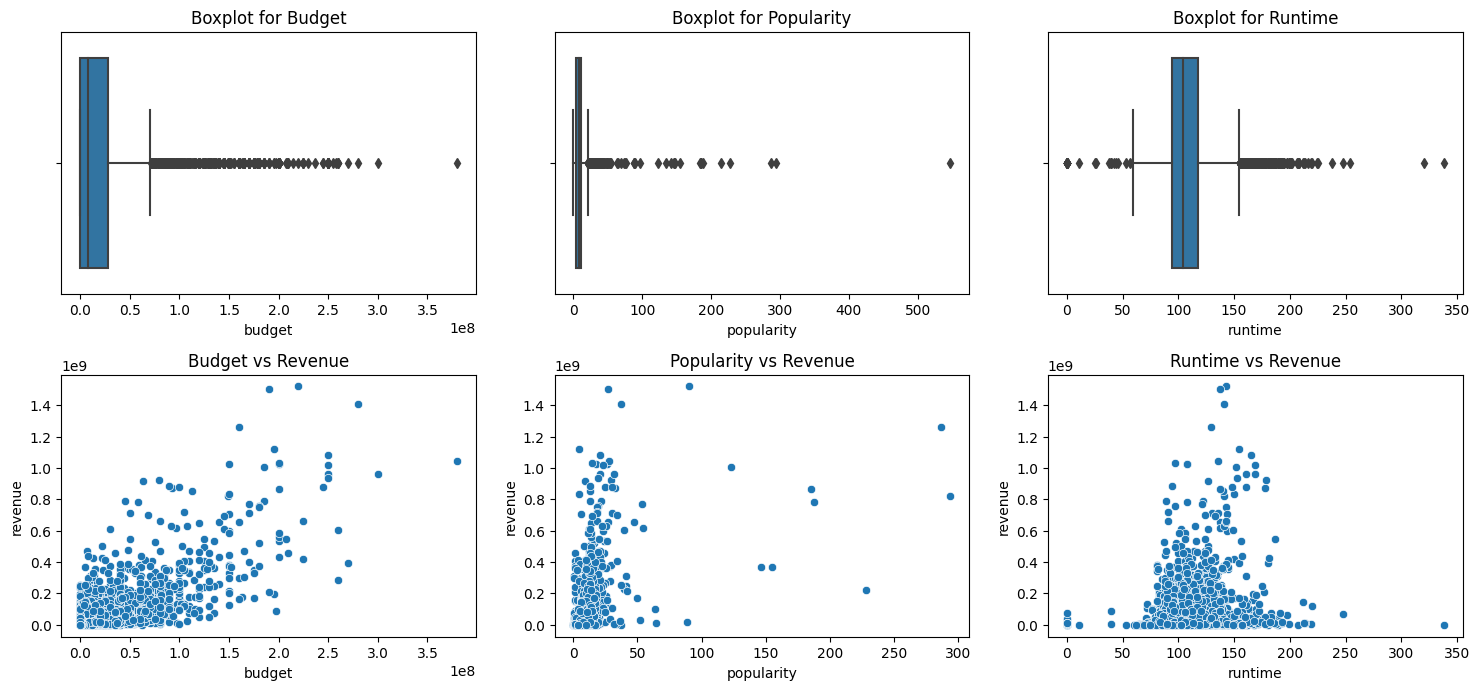

Text(0.5, 1.0, 'Correlation Matrix for Budget, Popularity, Runtime, and Revenue')

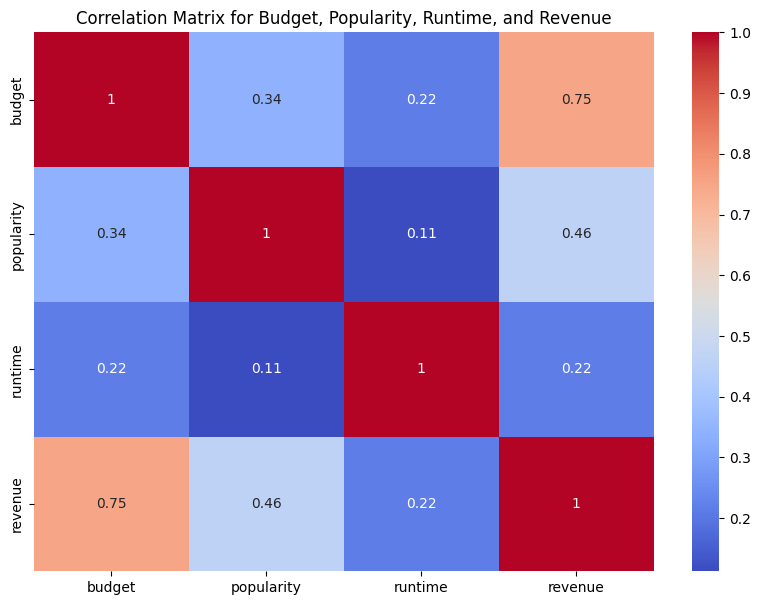

In [6]:
# 先对int64类型的features和revenue的关系进行判断

# 设置图的大小
plt.figure(figsize=(15, 10))

# 1. 箱线图
# Budget
plt.subplot(3, 3, 1)
sns.boxplot(x=df['budget'])
plt.title('Boxplot for Budget')

# Popularity
plt.subplot(3, 3, 2)
sns.boxplot(x=df['popularity'])
plt.title('Boxplot for Popularity')

# Runtime
plt.subplot(3, 3, 3)
sns.boxplot(x=df[ 'runtime'])
plt.title('Boxplot for Runtime')

# 2. 散点图
# Budget vs Revenue
plt.subplot(3, 3, 4)
sns.scatterplot(x=df['budget'], y=df['revenue'])
plt.title('Budget vs Revenue')

# Popularity vs Revenue
plt.subplot(3, 3, 5)
sns.scatterplot(x=df['popularity'], y=df['revenue'])
plt.title('Popularity vs Revenue')

# Runtime vs Revenue
plt.subplot(3, 3, 6)
sns.scatterplot(x=df['runtime'], y=df['revenue'])
plt.title('Runtime vs Revenue')

# 调整子图的间距
plt.tight_layout()
plt.show()

# 4. 相关矩阵 & 热力图
corr_matrix = df[['budget', 'popularity', 'runtime', 'revenue']].corr()
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Budget, Popularity, Runtime, and Revenue')

#budget 和 popularity比较重要，有相关性，其中budget更强
# #runtime在一定范围有较好的revenue，一旦过高或过低表现欠佳

**Interpretation**

Strong relationship between budget and revenue

moderate relationship between popularity and revenue

Extrem low/high runtime leads to decrease in revenue

# Handling missing data


In [27]:
df.isnull().sum()

id                                  0
belongs_to_collection            5917
budget                              0
genres                             23
homepage                         5032
imdb_id                             0
original_language                   0
original_title                      0
overview                           22
popularity                          0
poster_path                         2
production_companies              414
production_countries              157
release_date                        1
runtime                             6
spoken_languages                   62
status                              2
tagline                          1460
title                               3
Keywords                          669
cast                               26
crew                               38
revenue                          4398
belongs_to_collection_encoded       0
genres_str                          0
homepage_encoded                    0
first_produc

In [31]:
#用median代替runtime中的null
df['runtime'].fillna(df['runtime'].median(), inplace=True)

#1 missing value of release_date
df[df["release_date"].isnull()]
# Add in the release date 05/01/2020
df.loc[df['release_date'].isnull()==True, 'release_date']= '5/1/00'

# 对于分类数据和文本，使用"unknown"填充
columns_fill_unknown = ['belongs_to_collection', 'genres', 'homepage', 'imdb_id', 'original_language', 'original_title',
                        'overview', 'poster_path', 'production_companies', 'production_countries', 'release_date',
                        'spoken_languages', 'status', 'tagline', 'title', 'Keywords', 'cast', 'crew']

for col in columns_fill_unknown:
    df[col].fillna('unknown', inplace=True)



In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7398 entries, 0 to 7397
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   id                             7398 non-null   int64         
 1   belongs_to_collection          7398 non-null   object        
 2   budget                         7398 non-null   int64         
 3   genres                         7398 non-null   object        
 4   homepage                       7398 non-null   object        
 5   imdb_id                        7398 non-null   object        
 6   original_language              7398 non-null   object        
 7   original_title                 7398 non-null   object        
 8   overview                       7398 non-null   object        
 9   popularity                     7398 non-null   float64       
 10  poster_path                    7398 non-null   object        
 11  production_compan

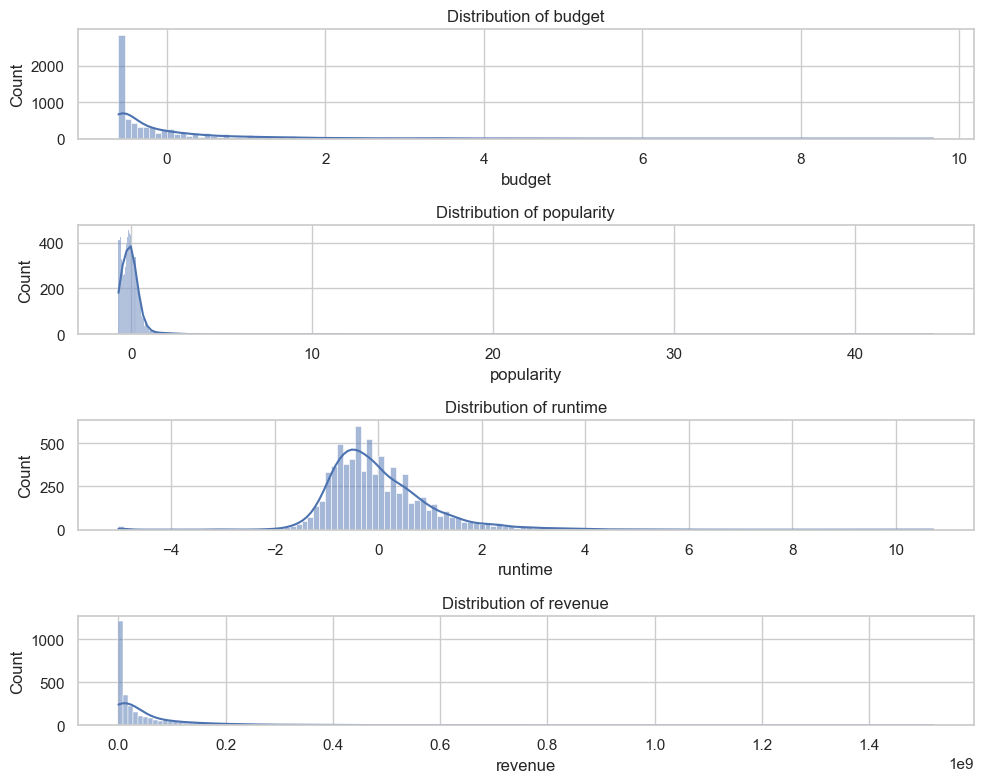

In [36]:
# 画出变量分布图
features = ['budget', 'popularity', 'runtime', 'revenue']
plt.figure(figsize=(10, 8))

for i, feature in enumerate(features):
    plt.subplot(len(features), 1, i+1)
    sns.histplot(df[feature], kde=True)  # 或者使用 plt.hist() 来画直方图
    plt.title('Distribution of ' + feature)
    plt.tight_layout()

plt.show()

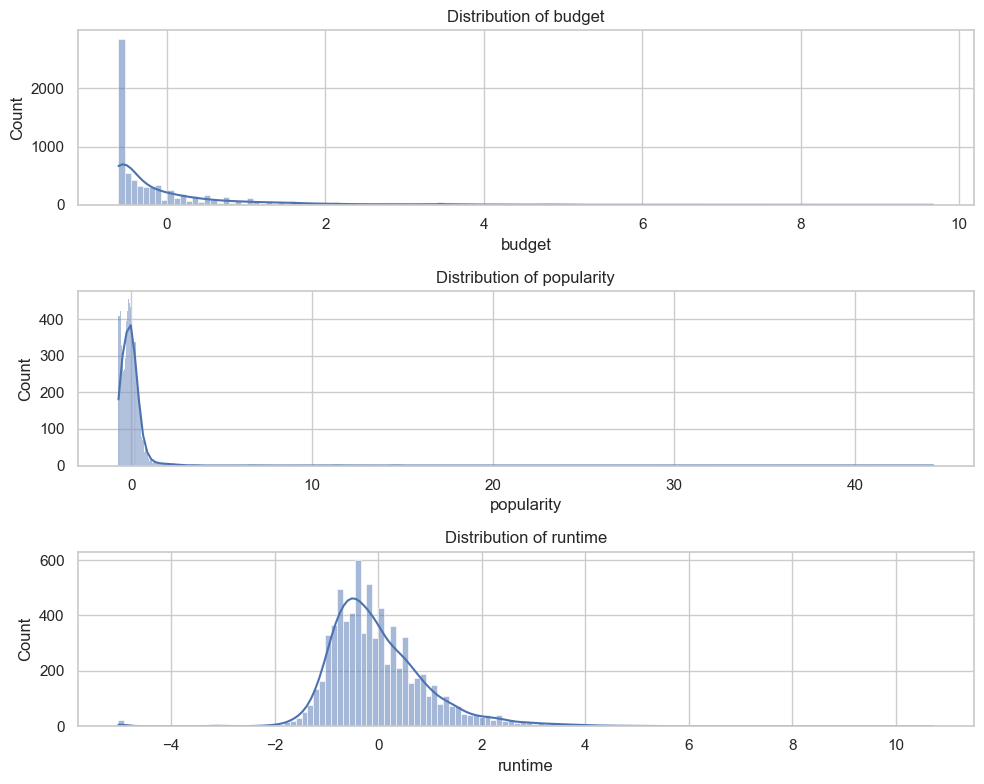

In [40]:
from sklearn.preprocessing import StandardScaler

# 创建StandardScaler对象
scaler = StandardScaler()

# standarization
for column in ['budget', 'popularity', 'runtime']:
    df[column] = scaler.fit_transform(df[[column]])
    
features = ['budget', 'popularity', 'runtime']
plt.figure(figsize=(10, 8))

#test
for i, feature in enumerate(features):
    plt.subplot(len(features), 1, i+1)
    sns.histplot(df[feature], kde=True)  
    plt.title('Distribution of ' + feature)
    plt.tight_layout()



# Feature Engineering


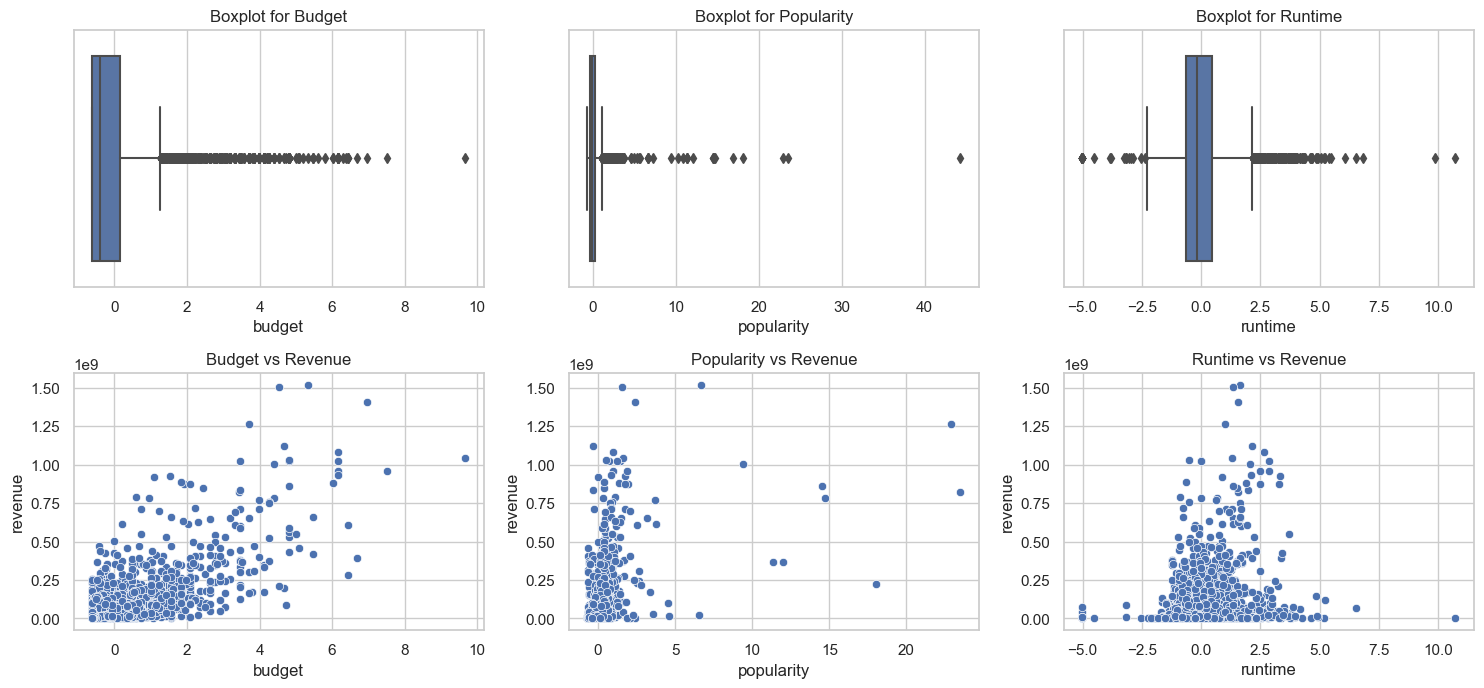

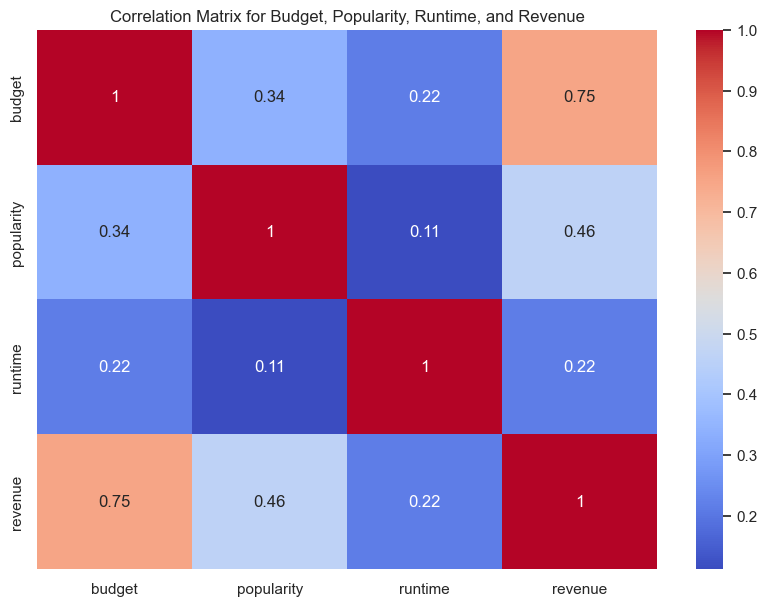

In [41]:
# 设置图的大小
plt.figure(figsize=(15, 10))

# 1. 箱线图
# Budget
plt.subplot(3, 3, 1)
sns.boxplot(x=df['budget'])
plt.title('Boxplot for Budget')

# Popularity
plt.subplot(3, 3, 2)
sns.boxplot(x=df['popularity'])
plt.title('Boxplot for Popularity')

# Runtime
plt.subplot(3, 3, 3)
sns.boxplot(x=df['runtime'])
plt.title('Boxplot for Runtime')

# 2. 散点图
# Budget vs Revenue
plt.subplot(3, 3, 4)
sns.scatterplot(x=df['budget'], y=df['revenue'])
plt.title('Budget vs Revenue')

# Popularity vs Revenue
plt.subplot(3, 3, 5)
sns.scatterplot(x=df['popularity'], y=df['revenue'])
plt.title('Popularity vs Revenue')

# Runtime vs Revenue
plt.subplot(3, 3, 6)
sns.scatterplot(x=df['runtime'], y=df['revenue'])
plt.title('Runtime vs Revenue')

# 调整子图的间距
plt.tight_layout()
plt.show()

# 4. 相关矩阵 & 热力图
corr_matrix = df[['budget', 'popularity', 'runtime', 'revenue']].corr()
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Budget, Popularity, Runtime, and Revenue')

#budget 和 popularity比较重要，有相关性，其中budget更强
# #runtime在一定范围有较好的revenue，一旦过高或过低表现欠佳

feature_model.append('budget')
feature_model.append('popularity')
feature_model.append('runtime')

## 1. belongs_to_collection

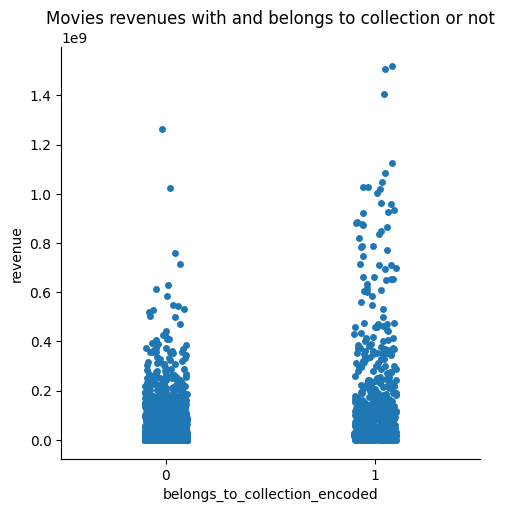

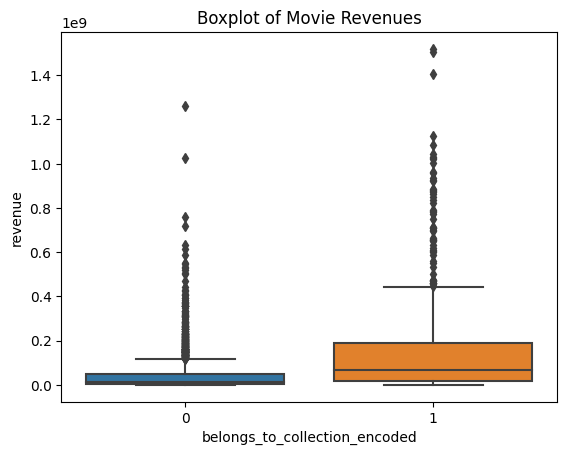

In [7]:
#convert belongs_to_collection into one-hot-encoding
df['belongs_to_collection_encoded'] = df['belongs_to_collection'].apply(lambda x: 0 if pd.isna(x) else 1)

#plot the relationship
sns.catplot(x='belongs_to_collection_encoded', y='revenue', data=df)
plt.title('Movies revenues with and belongs to collection or not')
plt.show()

sns.boxplot(x='belongs_to_collection_encoded', y='revenue', data=df)
plt.title('Boxplot of Movie Revenues')
plt.show()

**Movies belong to a collection seems to have higher revenue**

In [42]:
feature_model.append('belongs_to_collection_encoded')

##  3   genres  

In [43]:
for i in enumerate(df['genres'][:5]):
    print(i)

(0, "[{'id': 35, 'name': 'Comedy'}]")
(1, "[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 10749, 'name': 'Romance'}]")
(2, "[{'id': 18, 'name': 'Drama'}]")
(3, "[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'name': 'Drama'}]")
(4, "[{'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}]")


In [44]:

def extract_genre_names(genres):
    try:
        # 解析字符串为Python的字面量结构（列表或字典）
        genres_list = ast.literal_eval(genres)
        # 提取所有的类型名称并将它们连接为一个字符串
        genre_names = ', '.join([genre['name'] for genre in genres_list if 'name' in genre])
        return genre_names
    except:
        # 如果无法解析字符串，返回空字符串
        return ''

# 假设 'df' 是您的DataFrame，并且它有一个名为 'genres' 的列
df['genres'] = df['genres'].apply(extract_genre_names)

# 展示结果
print(df['genres'].head())


0                            Comedy
1    Comedy, Drama, Family, Romance
2                             Drama
3                   Thriller, Drama
4                  Action, Thriller
Name: genres, dtype: object


/var/folders/rs/_2tj5sx1197bk310vhmpg05r0000gn/T/ipykernel_81196/341327774.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(x='genres', y='revenue', data=df_exploded_sorted, ci=None, order=genre_median_revenue.index)
/var/folders/rs/_2tj5sx1197bk310vhmpg05r0000gn/T/ipykernel_81196/341327774.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  median_plot = sns.pointplot(x='genres', y='revenue', data=df_exploded_sorted, ci=None, join=False, color='darkred', markers='D', order=genre_median_revenue.index)


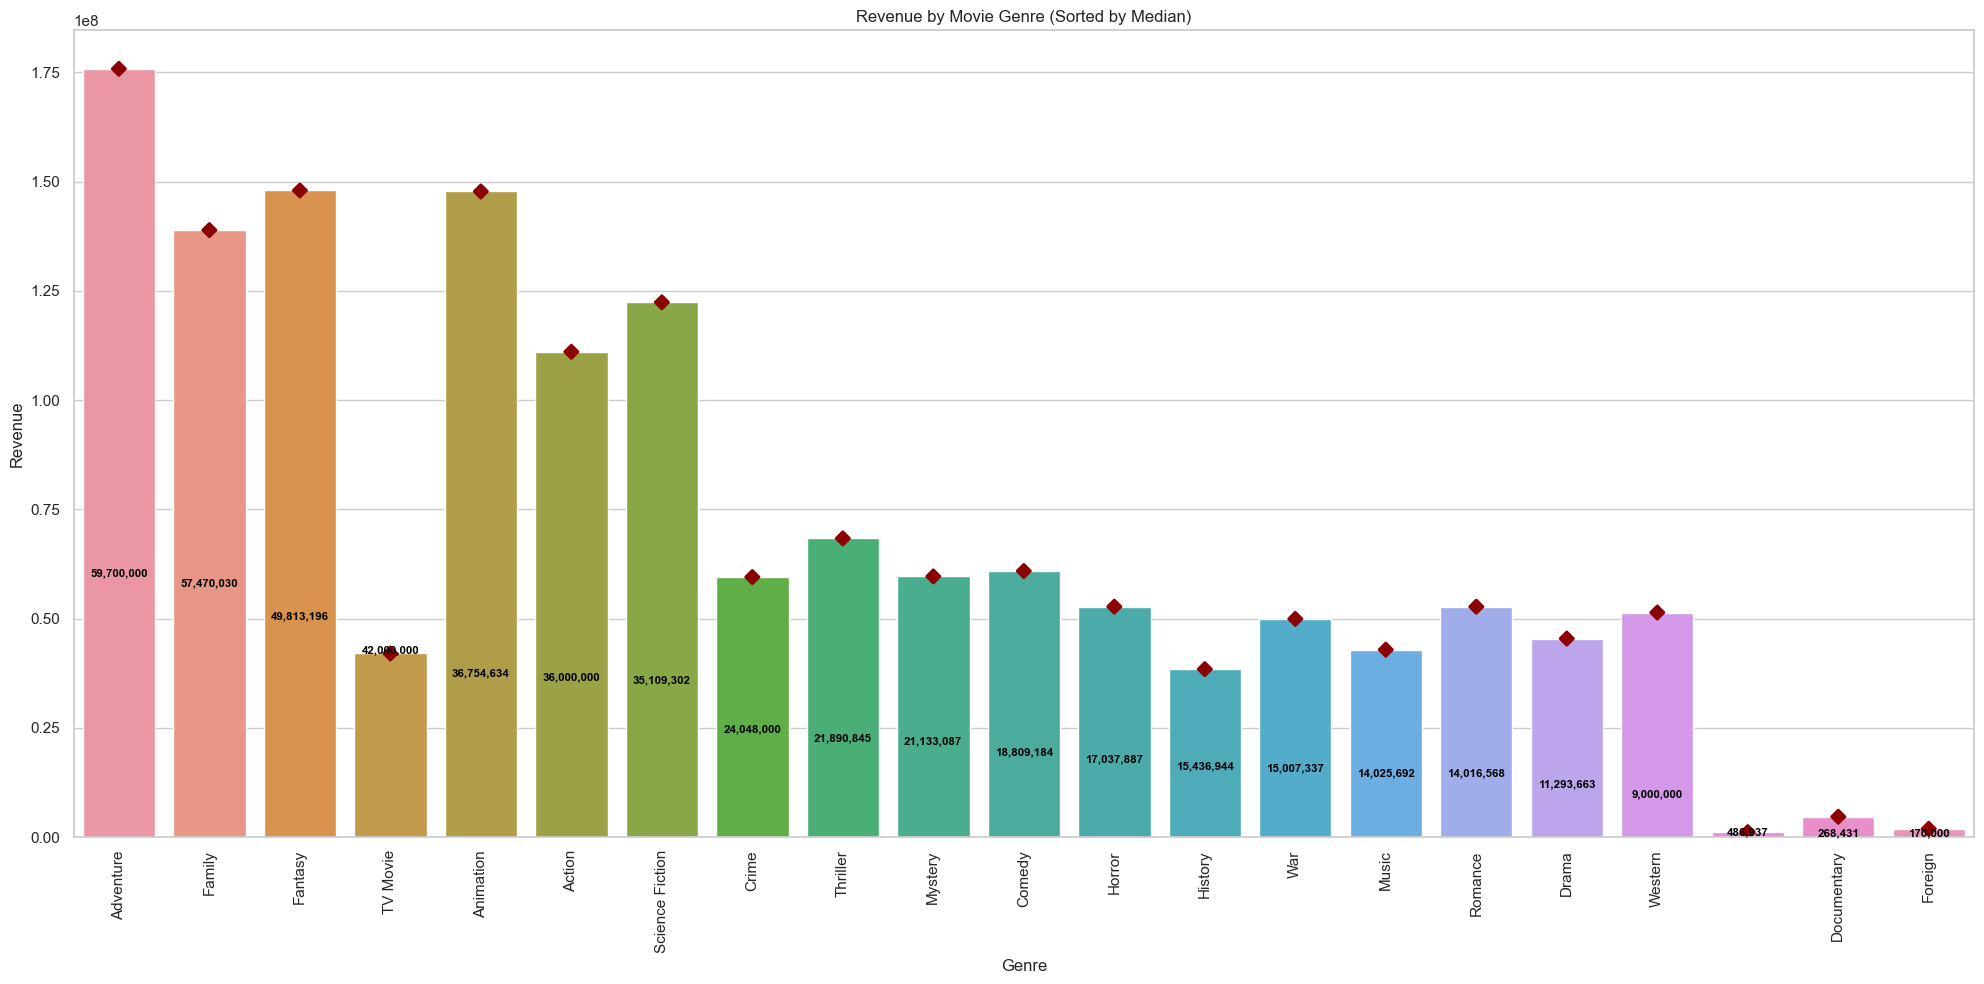

In [45]:
# 分割 'genres' 并展开 DataFrame
df_exploded = df.assign(genres=df['genres'].str.split(', ')).explode('genres')

# 计算每个类型的收入中位数
genre_median_revenue = df_exploded.groupby('genres')['revenue'].median().sort_values(ascending=False)

# 根据中位数排序，这将为绘图提供正确的顺序
df_exploded_sorted = df_exploded.set_index('genres').loc[genre_median_revenue.index].reset_index()

# 使用 seaborn 绘制条形图
plt.figure(figsize=(20, 10))  # 调整图表大小
barplot = sns.barplot(x='genres', y='revenue', data=df_exploded_sorted, ci=None, order=genre_median_revenue.index)

# 绘制每个类型的收入中位数
median_plot = sns.pointplot(x='genres', y='revenue', data=df_exploded_sorted, ci=None, join=False, color='darkred', markers='D', order=genre_median_revenue.index)

# 标记中位数
for xtick, label in enumerate(genre_median_revenue.index):
    barplot.text(xtick, genre_median_revenue[label], f'{genre_median_revenue[label]:,.0f}', 
                 horizontalalignment='center', size='x-small', color='black', weight='semibold')

# 旋转 x 轴的标签以便更容易阅读
plt.xticks(rotation=90)

# 设置标题和标签
plt.title('Revenue by Movie Genre (Sorted by Median)')
plt.xlabel('Genre')
plt.ylabel('Revenue')

# 显示图表
plt.tight_layout()
plt.show()


**某些种类的中位数明显更好，表示这类电影更可能获得高票房**

## 4 Homepage

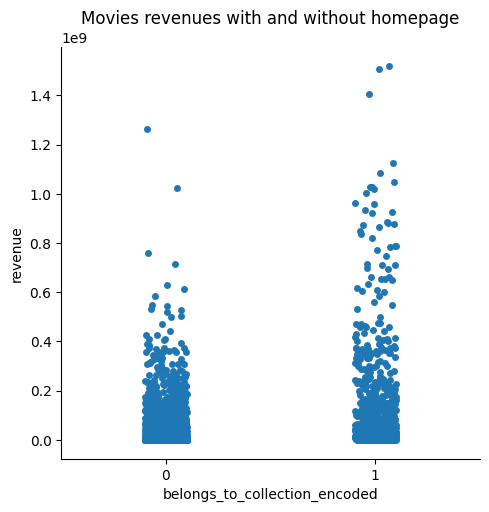

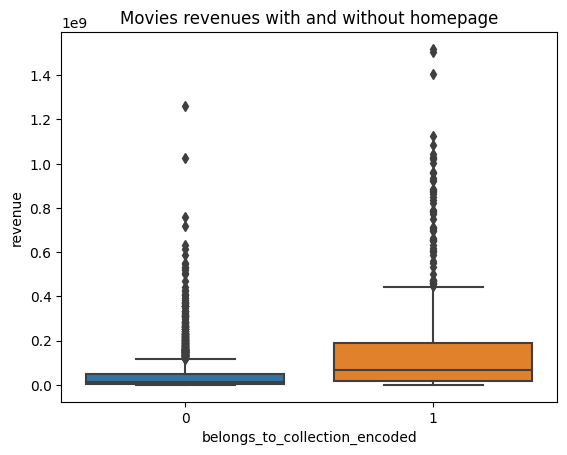

In [10]:
#convert homepage into one-hot-encoding
df['homepage_encoded'] = df['homepage'].apply(lambda x: 0 if pd.isna(x) else 1)

#plot the relationship
sns.catplot(x='belongs_to_collection_encoded', y='revenue', data=df)
plt.title('Movies revenues with and without homepage')
plt.show()

sns.boxplot(x='belongs_to_collection_encoded', y='revenue', data=df)
plt.title('Movies revenues with and without homepage')
plt.show()

**有homepage似乎revenue更高**

## 5 IMDB_id

**没diao用**

## 6 original_language


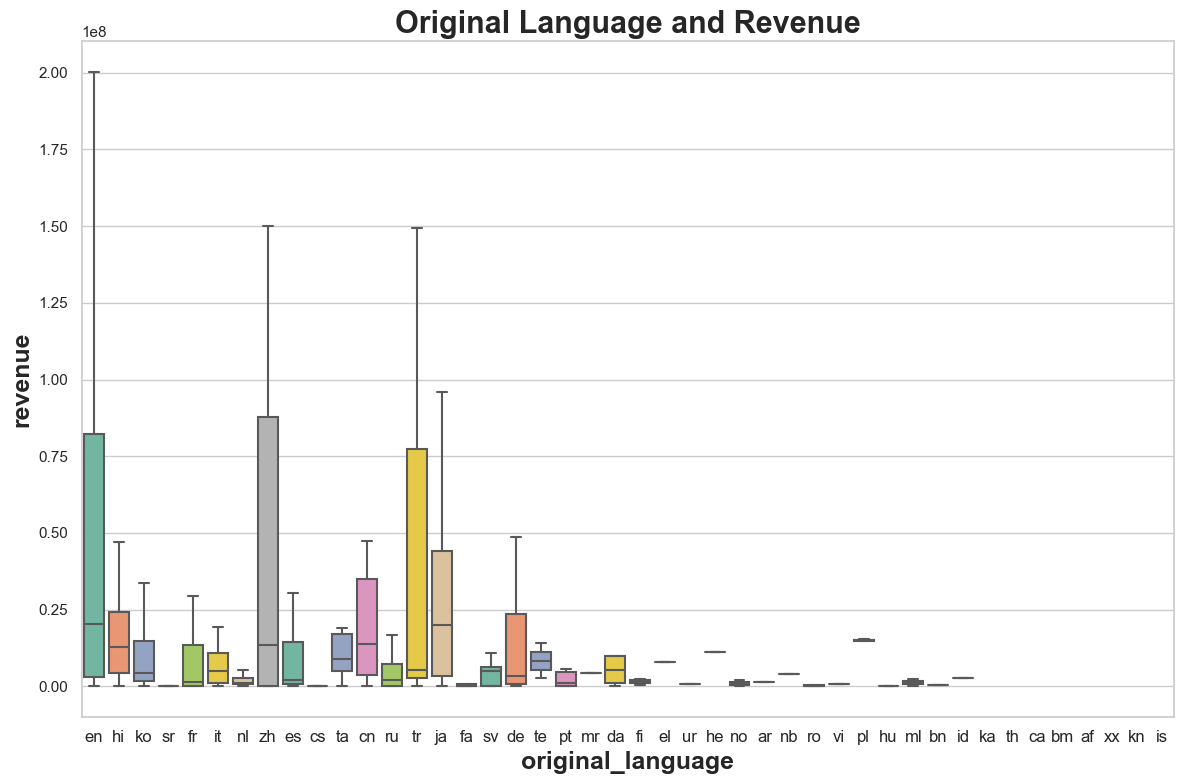

In [11]:
# Settings
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 8))  
ax.tick_params(axis='x', labelsize=12)  
ax.set_title('Original Language and Revenue', fontsize=22, fontweight='bold')  
ax.set_ylabel('Revenue', fontsize=18, fontweight='bold') 
ax.set_xlabel('Original Language', fontsize=18, fontweight='bold')  

# Plot the boxplot
sns.boxplot(ax=ax, y='revenue', x='original_language', data=df,
            showfliers=False, 
            palette="Set2",  # 
            orient='v')  

# 改善图表布局
plt.tight_layout()

# 显示图表
plt.show()

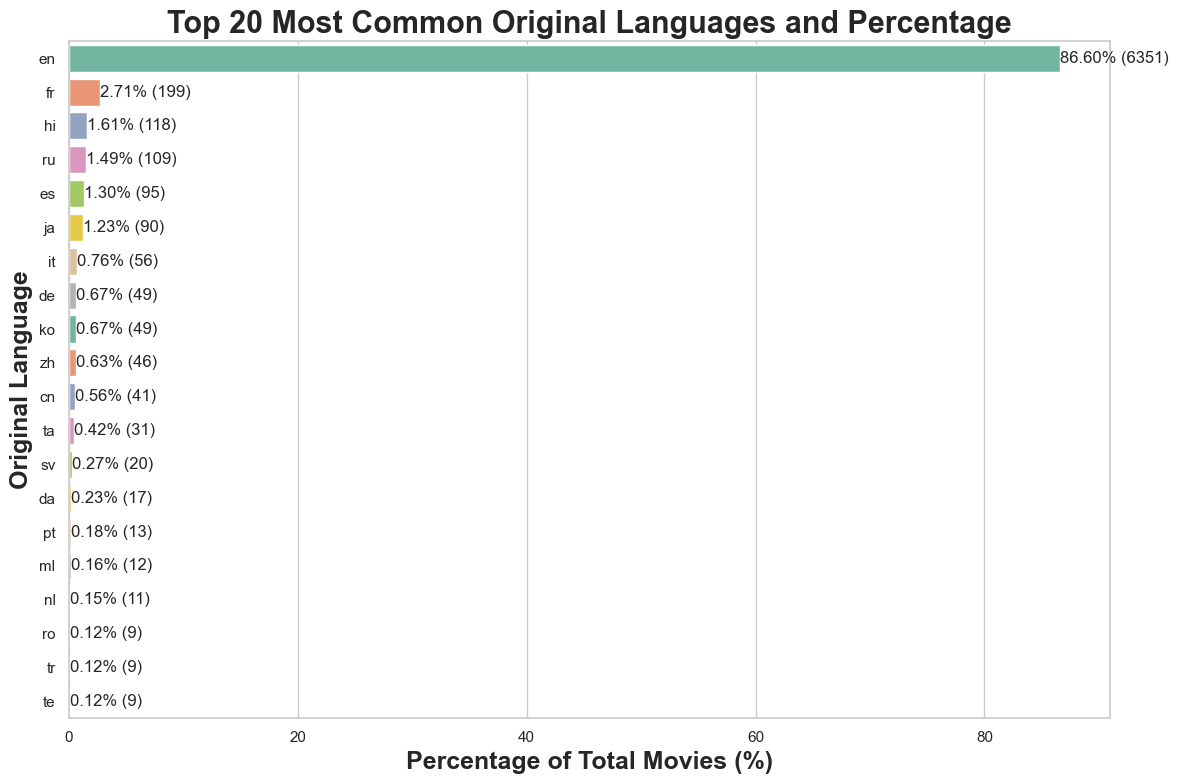

In [12]:
# Calculate the count of movies per language and sort them
language_counts = df['original_language'].value_counts().head(20)
# Calculate the percentage of each language
language_percentages = (language_counts / language_counts.sum()) * 100

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))
sns.barplot(x=language_percentages.values, y=language_percentages.index, palette="Set2")

# Add the percentage text on the bars
for i, (percent, count) in enumerate(zip(language_percentages.values, language_counts)):
    plt.text(percent, i, f'{percent:.2f}% ({count})', va='center')

# Set the chart title and labels
plt.title('Top 20 Most Common Original Languages and Percentage', fontsize=22, fontweight='bold')
plt.xlabel('Percentage of Total Movies (%)', fontsize=18, fontweight='bold')
plt.ylabel('Original Language', fontsize=18, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()


## 7   original_title 
**无关紧要？**

## 8   overview

**用nltk做情感分析？？？**

## 10  poster_path
**无关紧要，可去掉**


## 11  production_companies

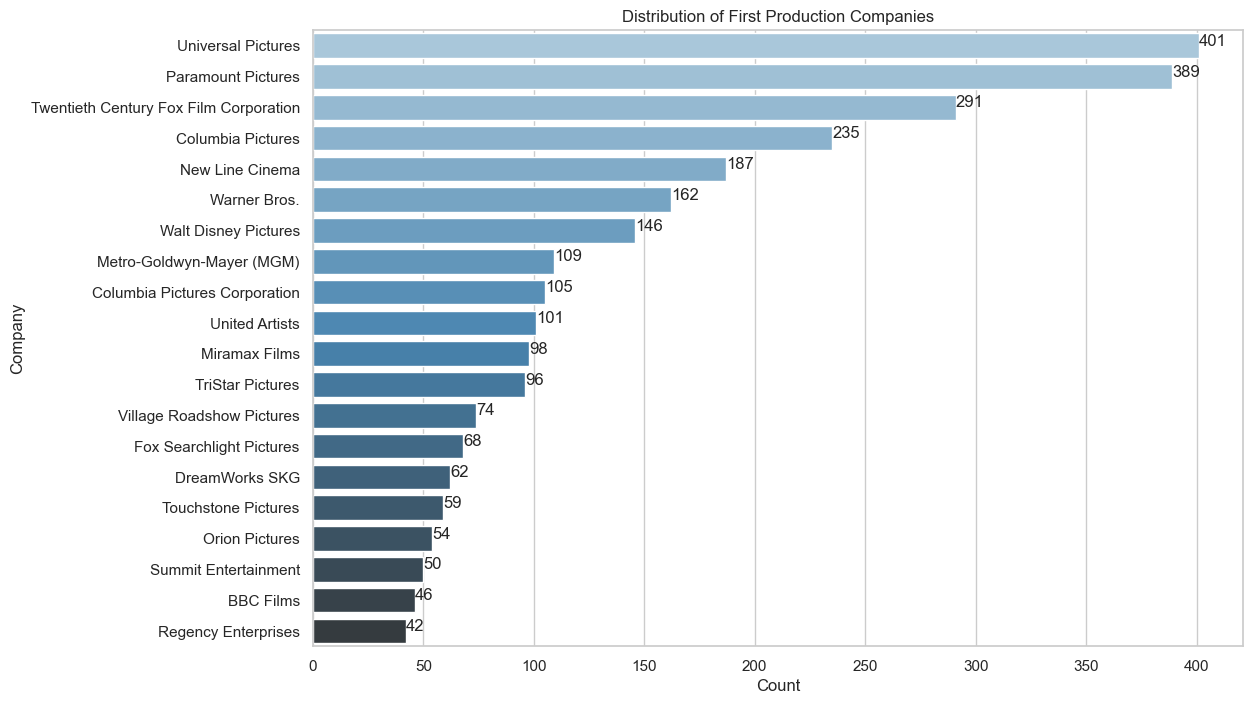

In [13]:
#  extract only the first company name
def extract_first_company_name(companies_str):
    try:
        companies_list = ast.literal_eval(companies_str)
        if companies_list and 'name' in companies_list[0]:
            return companies_list[0]['name']
        else:
            return None
    except:
        return None

#  create a new column with the first production company name
df['first_production_company'] = df['production_companies'].apply(extract_first_company_name)

# can now drop the original 'production_companies' column if it's no longer needed
# df = df.drop('production_companies', axis=1)

# Count the occurrences of each company
company_counts = df['first_production_company'].value_counts()

# Convert to DataFrame for plotting
company_counts_df = company_counts.reset_index()
company_counts_df.columns = ['Company', 'Count']

# Plotting the distribution of production companies
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Company', data=company_counts_df.head(20), palette="Blues_d")
plt.title('Distribution of First Production Companies')
plt.xlabel('Count')
plt.ylabel('Company')

# Annotate the count on the bars (optional)
for index, value in enumerate(company_counts_df.head(20)['Count']):
    plt.text(value, index, str(value))

plt.show()


In [14]:
# Define thresholds in ascending order
thresholds = [10, 50, 150]

# Create bins
bins = pd.cut(df['first_production_company'].map(company_counts), 
              [-np.inf] + thresholds + [np.inf],
              labels=[f'1-{thresholds[0]} movies', 
                      f'{thresholds[0]+1}-{thresholds[1]} movies', 
                      f'{thresholds[1]+1}-{thresholds[2]} movies', 
                      f'{thresholds[2]+1}+ movies'])

# Perform one-hot encoding on the binned column
one_hot_df = pd.get_dummies(bins).astype(int)
# Merge with the original DataFrame (optional)
df_with_one_hot = df.join(one_hot_df)


## 12  production_countries 


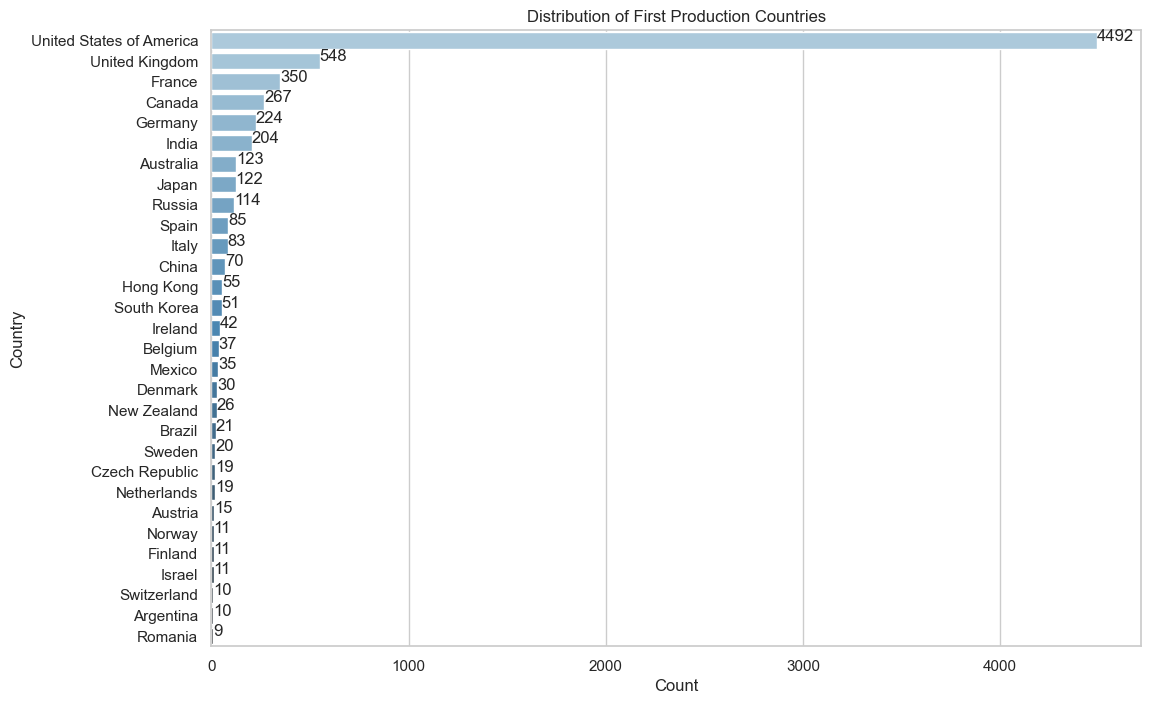

In [15]:
# extract country name
def extract_first_country_name(countries_str):
    try:
        countries_list = ast.literal_eval(countries_str)
        if countries_list and 'name' in countries_list[0]:
            return countries_list[0]['name']
        else:
            return None
    except:
        return None

# create a new column with the first production country name
df['first_production_country'] = df['production_countries'].apply(extract_first_country_name)

# You can now drop the original 'production_countries' column if it's no longer needed
# df = df.drop('production_countries', axis=1)

# Count the occurrences of each country
country_counts = df['first_production_country'].value_counts()

# Convert to DataFrame for plotting
country_counts_df = country_counts.reset_index()
country_counts_df.columns = ['Country', 'Count']

# Plotting the distribution of production countries
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Country', data=country_counts_df.head(30), palette="Blues_d")
plt.title('Distribution of First Production Countries')
plt.xlabel('Count')
plt.ylabel('Country')

# Annotate the count on the bars (optional)
for index, value in enumerate(country_counts_df.head(30)['Count']):
    plt.text(value, index, str(value))

plt.show()


In [16]:
# Define thresholds in ascending order for countries
country_thresholds = [20, 200, 500]

# Create bins for the country counts
country_bins = pd.cut(df['first_production_country'].map(country_counts), 
                      [-np.inf] + country_thresholds + [np.inf],
                      labels=[f'1-{country_thresholds[0]} movies', 
                              f'{country_thresholds[0]+1}-{country_thresholds[1]} movies', 
                              f'{country_thresholds[1]+1}-{country_thresholds[2]} movies', 
                              f'{country_thresholds[2]+1}+ movies'])

# Perform one-hot encoding on the binned country column
country_one_hot_df = pd.get_dummies(country_bins).astype(int)

# Merge with the original DataFrame (optional)
df_with_country_one_hot = df.join(country_one_hot_df)


## 13  release_date

In [17]:
# 将 'release_date' 列从字符串转换为datetime对象，指定日期的格式
df['release_date'] = pd.to_datetime(df['release_date'], format='%m/%d/%y')

# 从 'release_date' 中提取年份、一周中的第几天（星期几）、月份
df["release_year"] = df["release_date"].dt.year
df["release_day"] = df["release_date"].dt.dayofweek
df["release_month"] = df["release_date"].dt.month

#这里还有异常数据要提取

## 15  spoken_languages 

**和language重复了，不用考虑**

## 16  status 

**不采用**

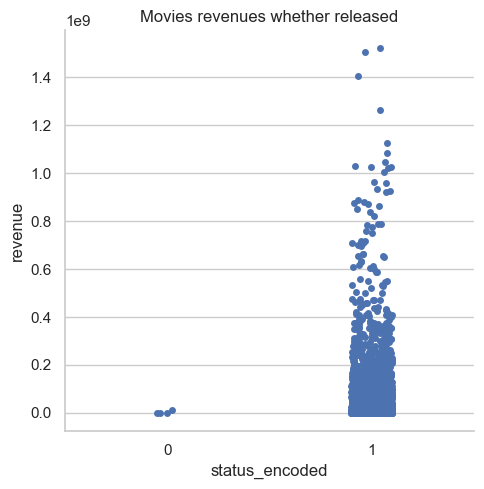

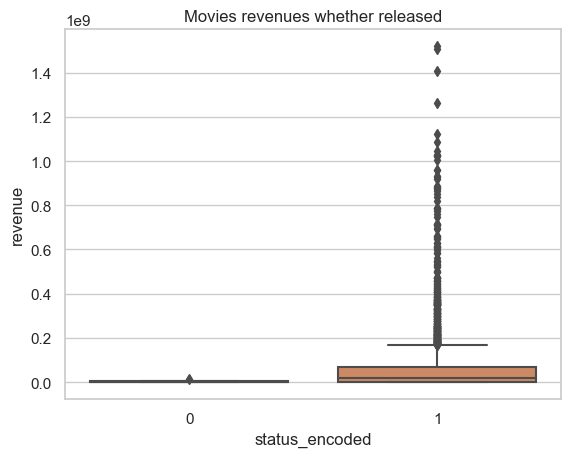

In [18]:
df['status_encoded'] = df['status'].apply(lambda x: 1 if x == 'Released' else 0)

#plot the relationship
sns.catplot(x='status_encoded', y='revenue', data=df)
plt.title('Movies revenues whether released')
plt.show()

sns.boxplot(x='status_encoded', y='revenue', data=df)
plt.title('Movies revenues whether released')
plt.show()

## 17  tagline 


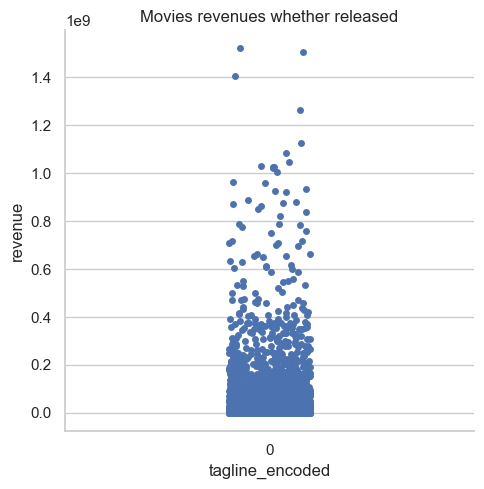

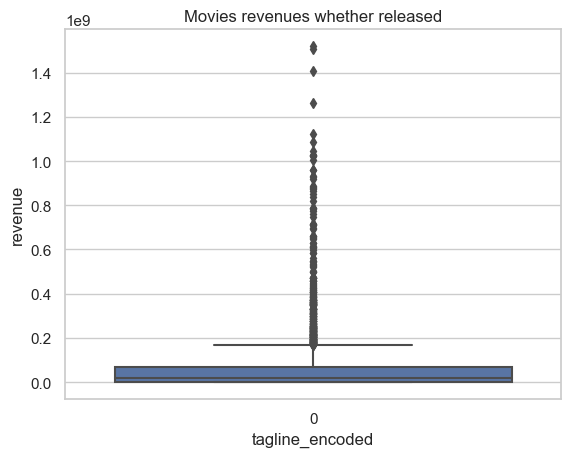

In [23]:
df['tagline_encoded'] = df['tagline'].apply(lambda x: 1 if x == 'Released' else 0)

#plot the relationship
sns.catplot(x='tagline_encoded', y='revenue', data=df)
plt.title('Movies revenues whether released')
plt.show()

sns.boxplot(x='tagline_encoded', y='revenue', data=df)
plt.title('Movies revenues whether released')
plt.show()

## 18  title   
## 19  Keywords 


## 20  cast
## 21  crew 

In [20]:
# 定义提取数量的函数
def count_elements(json_list):
    try:
        # 将字符串解析为列表
        elements = ast.literal_eval(json_list)
        # 返回列表中元素的数量
        return len(elements)
    except (ValueError, SyntaxError):
        # 如果字符串不能被解析，返回0或NaN
        return 0  # 或者 pd.np.nan 如果你想要在无法解析的情况下标识为NaN

# 现在应用这个函数到'cast'和'crew'列
df['cast_count'] = df['cast'].apply(count_elements)
df['crew_count'] = df['crew'].apply(count_elements)


In [21]:
print(df[['cast_count', 'crew_count']].head())

   cast_count  crew_count
0          24          72
1          20           9
2          51          64
3           7           3
4           4           2


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7398 entries, 0 to 7397
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   id                             7398 non-null   int64         
 1   belongs_to_collection          1481 non-null   object        
 2   budget                         7398 non-null   int64         
 3   genres                         7375 non-null   object        
 4   homepage                       2366 non-null   object        
 5   imdb_id                        7398 non-null   object        
 6   original_language              7398 non-null   object        
 7   original_title                 7398 non-null   object        
 8   overview                       7376 non-null   object        
 9   popularity                     7398 non-null   float64       
 10  poster_path                    7396 non-null   object        
 11  production_compan

In [24]:
# 选择指定的列
columns_to_select = [
    'id', 'budget', 'runtime', 'popularity', 
    'belongs_to_collection_encoded', 'homepage_encoded', 
    'first_production_company', 'first_production_country', 
    'release_year', 'release_month', 'release_day', 
    'cast_count', 'crew_count', 'revenue'
]

# 创建一个新的DataFrame，仅包含这些列
new_df = df[columns_to_select].copy()

# 查看新的DataFrame
print(new_df.head())

   id    budget  runtime  popularity  belongs_to_collection_encoded  \
0   1  14000000     93.0    6.575393                              1   
1   2  40000000    113.0    8.248895                              1   
2   3   3300000    105.0   64.299990                              0   
3   4   1200000    122.0    3.174936                              0   
4   5         0    118.0    1.148070                              0   

   homepage_encoded first_production_company  first_production_country  \
0                 0       Paramount Pictures  United States of America   
1                 0     Walt Disney Pictures  United States of America   
2                 1               Bold Films  United States of America   
3                 1                     None                     India   
4                 0                     None               South Korea   

   release_year  release_month  release_day  cast_count  crew_count  \
0        2015.0            2.0          4.0          24  